In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau
import os

In [5]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150

def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                
                if img_arr is None:
                    print(f"No se pudo leer la imagen: {os.path.join(path, img)}")
                    continue
                
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Redimensionar a 150x150

                if resized_arr.shape != (img_size, img_size):
                    print(f"Tamaño incorrecto en la imagen: {os.path.join(path, img)}")
                    continue
                
                data.append([resized_arr, class_num])
            except Exception as e:
                print(f"Error procesando la imagen {os.path.join(path, img)}: {e}")
    return np.array(data, dtype=object)  # Cambia a 'dtype=object' para evitar el error de forma inhomogénea


In [10]:
train = get_training_data('F:/Users/Documents/Program Class/solo Ciencia de Datos/neumonia_modelo/chest_xray/train')
test = get_training_data('F:/Users/Documents/Program Class/solo Ciencia de Datos/neumonia_modelo/chest_xray/test')
val = get_training_data('F:/Users/Documents/Program Class/solo Ciencia de Datos/neumonia_modelo/chest_xray/val')

<Axes: xlabel='count'>

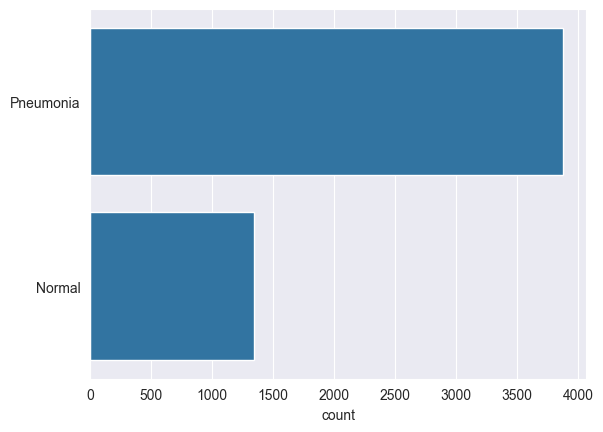

In [34]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)   

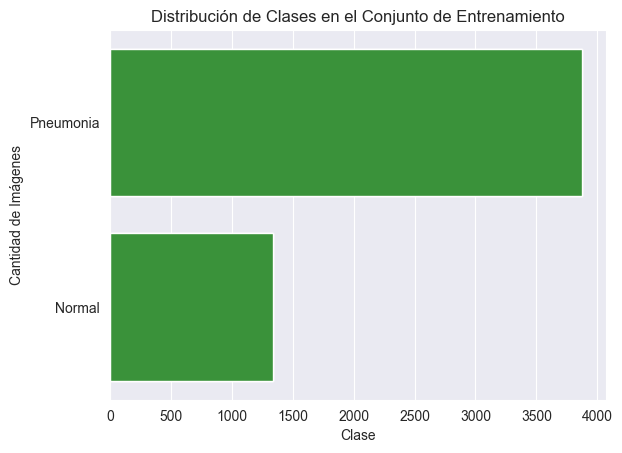

In [23]:
labels = train[:, 1]  # Extraer las etiquetas directamente (columna 1)
l = np.where(labels == 0, "Pneumonia", "Normal")  # Convertir 0 a 'Pneumonia' y 1 a 'Normal'
sns.set_style('darkgrid')
sns.countplot(l)
sns.set_style('darkgrid')
sns.countplot(l)
plt.title('Distribución de Clases en el Conjunto de Entrenamiento')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Imágenes')
sns.set_style('darkgrid')
sns.countplot(l)
plt.title('Distribución de Clases en el Conjunto de Entrenamiento')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Imágenes')
plt.show()


Text(0.5, 1.0, '0')

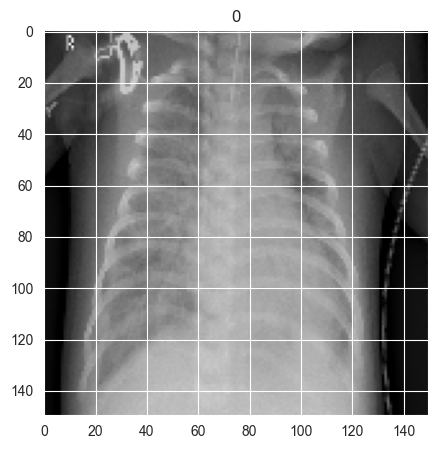

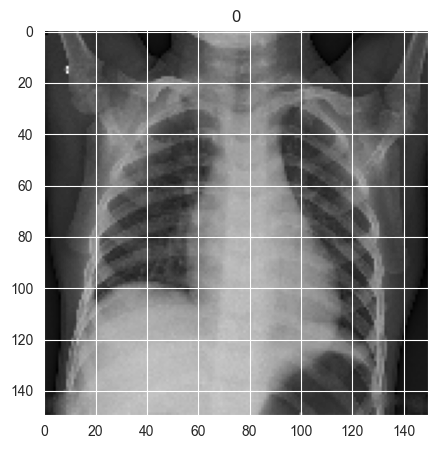

In [35]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

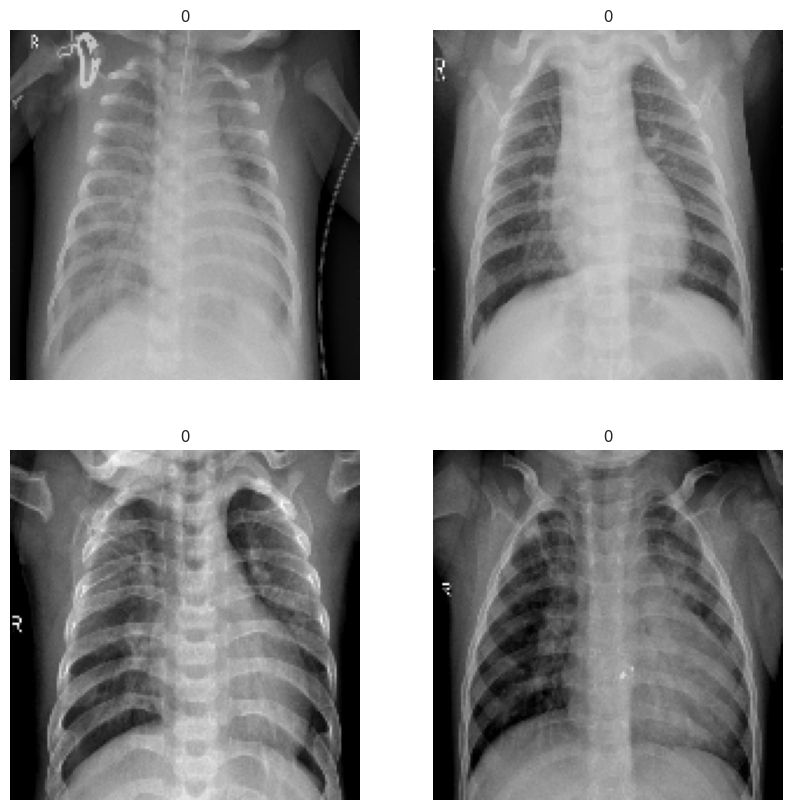

In [27]:
plt.figure(figsize=(10,10))
for i in range(4):  # Mostrar 4 imágenes
    plt.subplot(2, 2, i+1)
    plt.imshow(train[i][0], cmap='gray')
    plt.title(labels[train[i][1]])
    plt.axis('off')  # Elimina los ejes para que las imágenes se vean más limpias
plt.show()


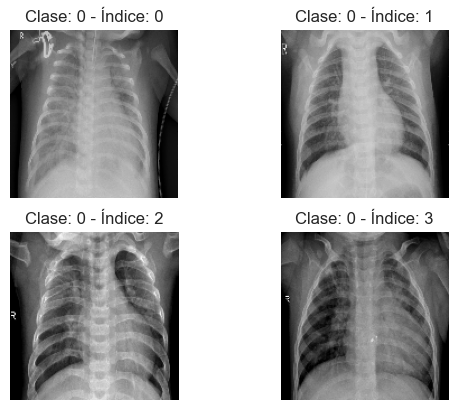

In [32]:
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(train[i][0], cmap='gray')
    label = labels[train[i][1]]
    plt.title(f'Clase: {label} - Índice: {i}')
    plt.axis('off')
plt.show()


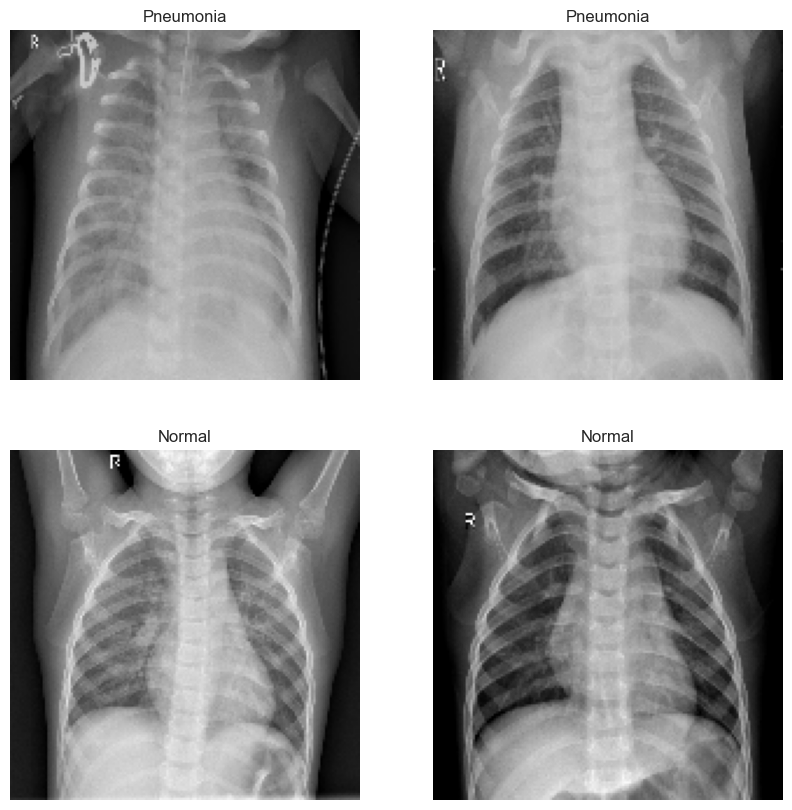

In [31]:
pneumonia_images = [img for img in train if img[1] == 0]  # Filtrar imágenes con Neumonía
normal_images = [img for img in train if img[1] == 1]     # Filtrar imágenes normales

plt.figure(figsize=(10,10))
for i in range(2):  # Mostrar 2 imágenes de cada clase
    plt.subplot(2, 2, i+1)
    plt.imshow(pneumonia_images[i][0], cmap='gray')
    plt.title('Pneumonia')
    plt.axis('off')

    plt.subplot(2, 2, i+3)
    plt.imshow(normal_images[i][0], cmap='gray')
    plt.title('Normal')
    plt.axis('off')

plt.show()

In [38]:
# Version anterior
# x_train = []
# y_train = []
# 
# x_val = []
# y_val = []
# 
# x_test = []
# y_test = []
# 
# for feature, label in train:
#     x_train.append(feature)
#     y_train.append(label)
# 
# for feature, label in test:
#     x_test.append(feature)
#     y_test.append(label)
#     
# for feature, label in val:
#     x_val.append(feature)
#     y_val.append(label)
    
# Version actual
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

# Separar las imágenes y etiquetas en train, test, val
for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Convertir a arrays NumPy
x_train = np.array(x_train).reshape(-1, img_size, img_size, 1)
x_val = np.array(x_val).reshape(-1, img_size, img_size, 1)
x_test = np.array(x_test).reshape(-1, img_size, img_size, 1)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Escalar los datos
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0


In [39]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
# Entrenar modelo anterior

# model = Sequential()
# model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(Flatten())
# model.add(Dense(units = 128 , activation = 'relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units = 1 , activation = 'sigmoid'))
# model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
# model.summary()

In [41]:
# Entrenar modelo nuevo

# Definición del modelo
model = Sequential()

# Definir la capa de entrada explícitamente con Input
model.add(Input(shape=(150, 150, 1)))

# Primera capa convolucional
model.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))

# Segunda capa convolucional
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))

# Tercera capa convolucional
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))

# Cuarta capa convolucional
model.add(Conv2D(128, (3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))

# Quinta capa convolucional
model.add(Conv2D(256, (3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))

# Aplanar las activaciones
model.add(Flatten())

# Capa densa (fully connected)
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))

# Capa de salida para clasificación binaria
model.add(Dense(units=1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 38, 38, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 38, 38, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 19, 19, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 19, 19, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 1,246,401 (4.75 MB)

 Trainable params: 1,245,313 (4.75 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [43]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience = 2, 
                                            verbose=1,
                                            factor=0.3, 
                                            min_lr=0.000001)

In [44]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

C:\Users\sebas\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.8019 - loss: 1.0970 - val_accuracy: 0.5000 - val_loss: 24.2091 - learning_rate: 0.0010
Epoch 2/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.8955 - loss: 0.2515 - val_accuracy: 0.5000 - val_loss: 38.3429 - learning_rate: 0.0010
Epoch 3/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.9084 - loss: 0.2517 - val_accuracy: 0.5625 - val_loss: 4.0405 - learning_rate: 0.0010
Epoch 4/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.9213 - loss: 0.2046 - val_accuracy: 0.5000 - val_loss: 26.6315 - learning_rate: 0.0010
Epoch 5/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9367 - loss: 0.1732
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.9367 - loss: 0.1732 - val_accuracy: 0.5000 - val_loss: 3.4996 - learning_rate: 0.0010
Epoch 6/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.9475 - loss: 0.

In [45]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.8584 - loss: 0.3102
Loss of the model is -  0.2998114228248596
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.8584 - loss: 0.3102
Accuracy of the model is -  87.0192289352417 %


Text(0, 0.5, 'Training & Validation Loss')

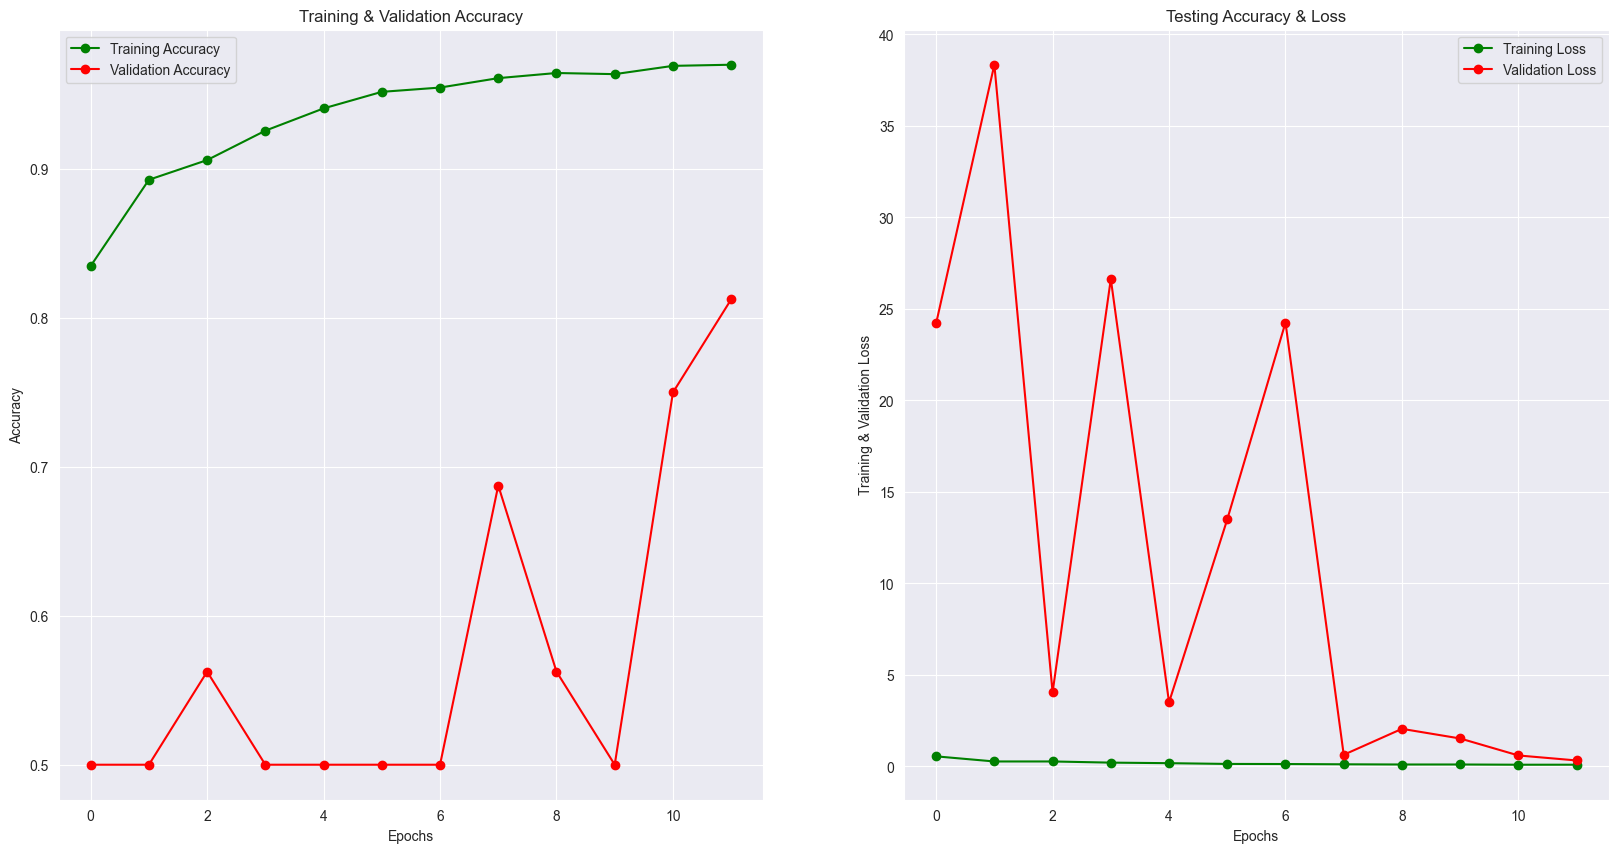

In [46]:
# Analisis despues del entrenamiento

epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")

In [50]:
# Obtener las probabilidades predichas por el modelo
predictions = model.predict(x_test)

# Convertir las probabilidades a clases: si la probabilidad es mayor a 0.5, se clasifica como 1, de lo contrario, como 0
predictions = (predictions > 0.5).astype("int32")

# Mostrar las primeras 15 predicciones
predictions[:15]

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]])

In [51]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.94      0.84      0.89       390
   Normal (Class 1)       0.78      0.91      0.84       234

           accuracy                           0.87       624
          macro avg       0.86      0.88      0.87       624
       weighted avg       0.88      0.87      0.87       624



In [52]:
cm = confusion_matrix(y_test,predictions)
cm

array([[329,  61],
       [ 20, 214]], dtype=int64)

In [53]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

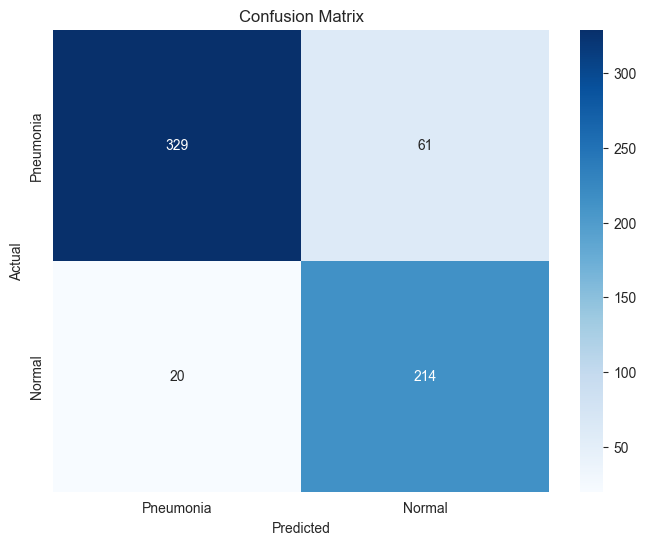

In [57]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Pneumonia', 'Normal'], yticklabels=['Pneumonia', 'Normal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

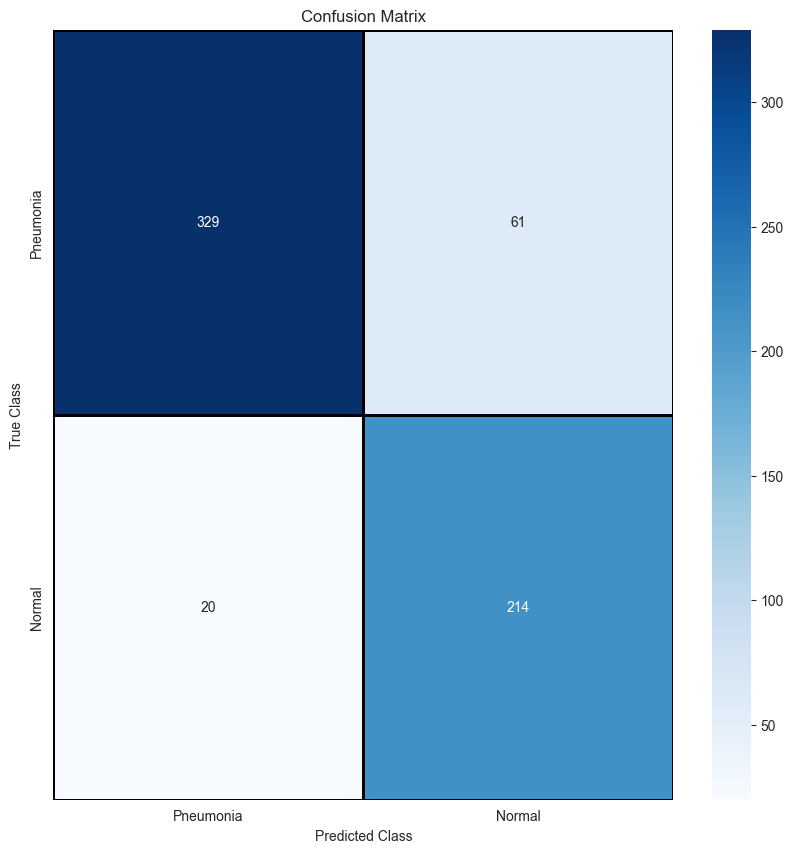

In [56]:
# version anterior
# plt.figure(figsize = (10,10))
# sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

# version actual
# Definir etiquetas si aún no lo has hecho
labels = ['Pneumonia', 'Normal']

# Graficar la matriz de confusión
plt.figure(figsize=(10,10))
sns.heatmap(cm, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)

# Agregar títulos y etiquetas a los ejes
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Mostrar el gráfico
plt.show()


In [58]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

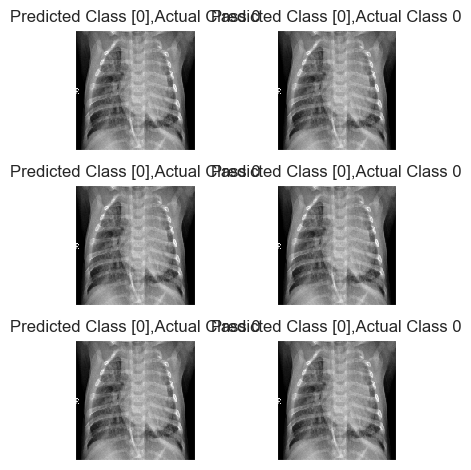

In [59]:
# Algunas de las clases predichas correctamente
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

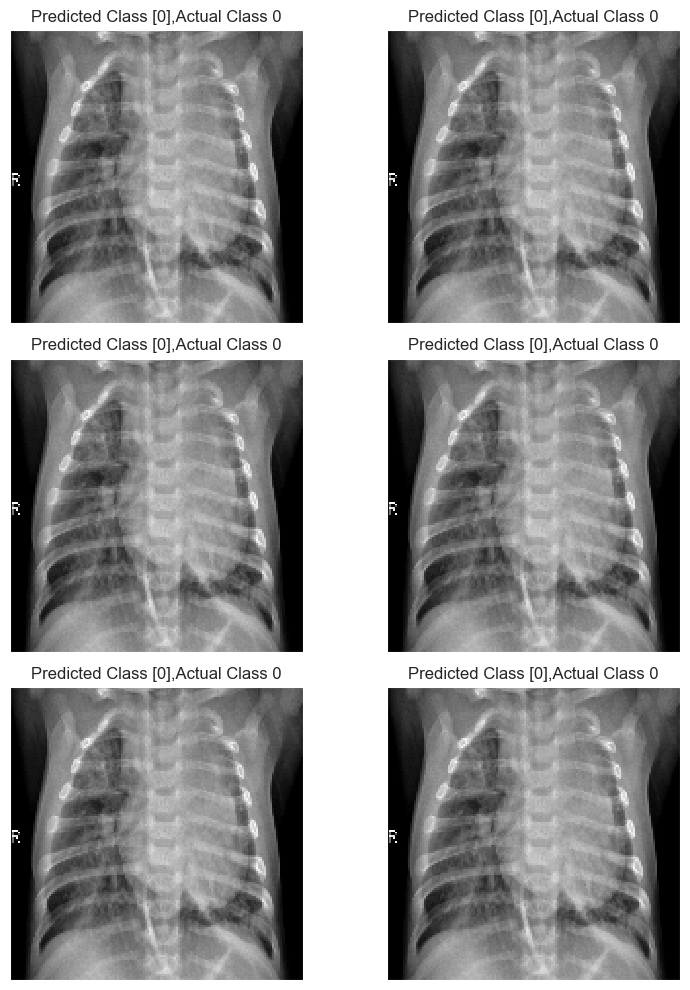

In [61]:
plt.figure(figsize=(10,10))  # Ajusta el tamaño de la figura
i = 0
for c in correct[:6]:
    plt.subplot(3, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150, 150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1
plt.show()  # Asegúrate de mostrar la figura al final


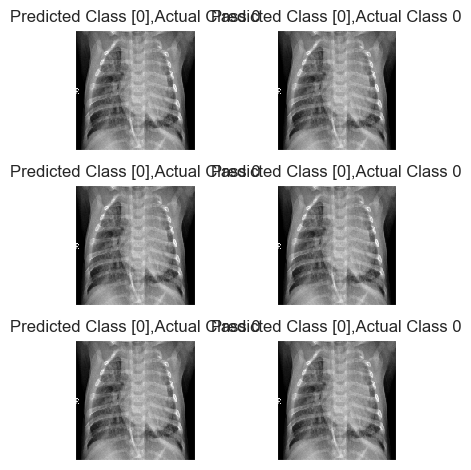

In [60]:
# # Algunas de las clases predichas incorrectamente
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

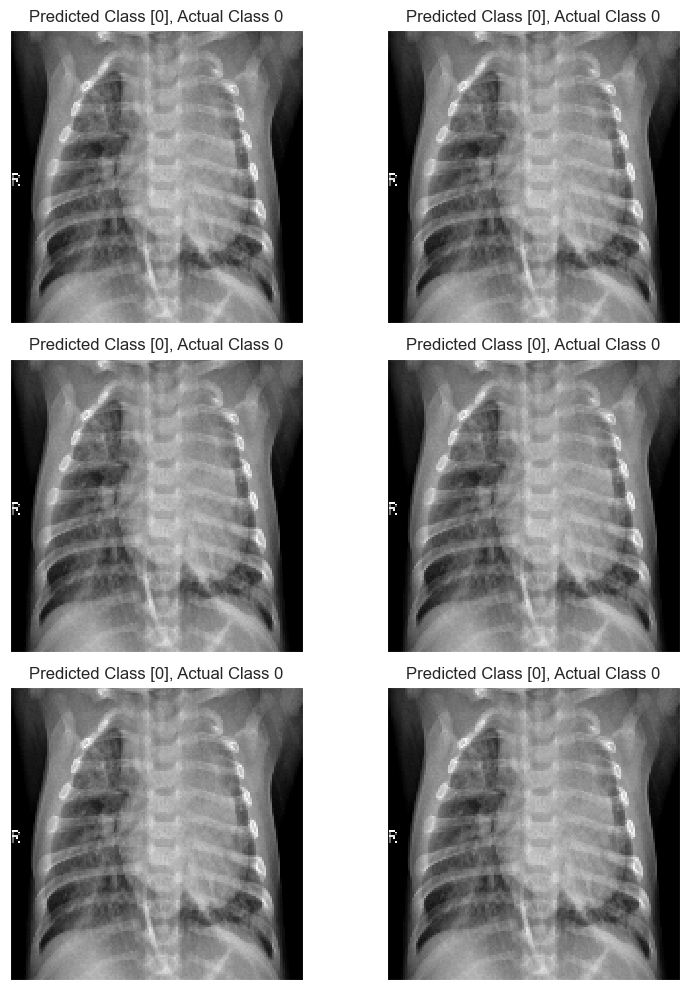

In [62]:
plt.figure(figsize=(10,10))  # Ajusta el tamaño de la figura
i = 0
for c in incorrect[:6]:
    plt.subplot(3, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150, 150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}, Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1
plt.show()  # Mostrar el gráfico


In [64]:
# Guardar el modelo en un archivo
model.save('F:/Users/Documents/Program Class/solo Ciencia de Datos/Neuroma_test/models/modelo_neumonia.h5')

In [68]:
import os
print(os.listdir(os.getcwd()))



['.idea', 'api.py', 'chest_xray', 'data', 'model.py', 'modelo_neumonia.h5', 'models', 'README.md', 'requirements.txt', 'sample.ipynb']


In [67]:
model.save('F:/Users/Documents/Program Class/solo Ciencia de Datos/Neuroma_test/models/modelo_neumonia.keras')